In [ ]:
<img src="xx.png" width="50%">

# Step3: Compile a single library

|**[Quick start](#Quick-start)** |**[How-to-use](#How-to-use)**|

# Overview
This pulls the Corpus together as one text string. 

# How-to-use

## Installation

Check installation has been made, as per the [READme](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/README.md)

## Prior steps
Either Step 1 or Step 2 if you are loading new documents. 

Or if documents are already text files, then they can just be copied to the folder.

Steps 3 and 4 are optional.

## Change Directory to find the portfolio text files

This code uses the OS module to select the file with the user's text-files.

In [4]:
#hide
import os
directory = '/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Text-files-as-generated-by-PDF-Miner'
# Change directory location for your particular set-up. Or if you want to just re-run this nuclear example, then you just need to change the reference to the high-level directories

## Create 1 whole Corpus
This pulls the Corpus together as one text string. 

In [5]:
#hide
Corpus_as_one_string=" "
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename)) as f:
            content = f.read()
            Corpus_as_one_string+=content
            f.close()

## Save interim results to a single document
This code saves this new text files to the folder:
- Corpus_as_one_string


In [6]:
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"

In [7]:
#e.g.
filename="Corpus_as_one_string"
f= open(directory+filename+".txt","w+") 
f.write(Corpus_as_one_string)
f.close()

# Next steps
Go to step 6 to generate keywords for the whole corpus. 

In [5]:
#SAME-LIST-WITHOUT_SCORE-FOR-GRAPH
Keywords_for_whole_corpus_noscore=keywords(Corpus_as_one_string, split=True,words=5, scores= False, lemmatize=False, deacc=False)

In [6]:
sorted(Keywords_for_whole_corpus_noscore)

['design',
 'designated',
 'designed',
 'designer',
 'designers',
 'designing',
 'designs',
 'include',
 'included',
 'includes',
 'including',
 'onr',
 'onrs',
 'require',
 'required',
 'requirement',
 'requirements',
 'requires',
 'requiring',
 'safety']

In [7]:
Graph_for_whole_corpus=get_graph(Corpus_as_one_string)

In [8]:
h=Graph_for_whole_corpus

In [9]:
import matplotlib.pyplot as plt #note a different module to one imported above

In [ ]:
#hide
# Explore this graph object
h.edges()[20:30]
h.nodes()[0:5]
sorted(h.nodes())[0:5]
h.neighbors("consult")
h.edge_weight(('pdf', 'principl'))

In [ ]:
'safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'

In [52]:
h.neighbors("oper")

KeyError: 'opera'

In [55]:
all_node_nx_graph = nx.Graph()
all_node_nx_graph=all_node_nx_graph.to_undirected() #my addition
for edge in h.edges():
    
    all_node_nx_graph.add_node(edge[0])
    all_node_nx_graph.add_node(edge[1])
    all_node_nx_graph.add_weighted_edges_from([(edge[0], edge[1], h.edge_weight(edge))])

    h.edge_weight(edge) # is this right ?
    

In [56]:
Graph_only_top_nodes=all_node_nx_graph.subgraph(['safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'])

In [57]:
Graph_only_top_nodes.nodes()

NodeView(('onr', 'design', 'appropri', 'secur', 'includ', 'oper', 'requir', 'site', 'process', 'safe'))

In [61]:
all_node_nx_graph.remove_nodes_from([n for n in all_node_nx_graph if n not in set(['safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'])])

In [62]:
all_node_nx_graph.nodes()

NodeView(('onr', 'requir', 'design', 'site', 'includ', 'secur', 'appropri', 'oper', 'process', 'safe'))

In [ ]:
#hide
#use this if problems between module names -->    if __name__=="__main__":

In [ ]:
# Montemurro and Zanette’s entropy based keyword extraction algorithm
print(mz_keywords(Corpus_as_one_string,scores=True,weighted=False,threshold="auto"))

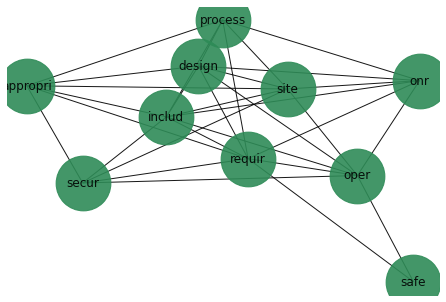

In [65]:
pos = nx.spring_layout(Graph_only_top_nodes)
plt.figure()
nx.draw(all_node_nx_graph, pos, edge_color='black', width=1, linewidths=1,node_size=3000, node_color='seagreen', alpha=0.9,labels={node: node for node in Graph_only_top_nodes.nodes()})
plt.axis('off')
plt.show()

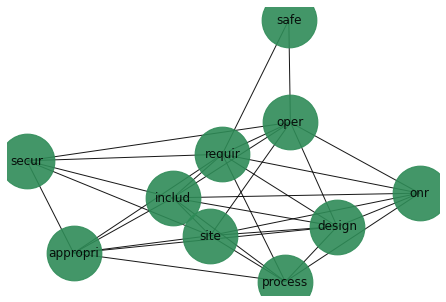

In [66]:
pos = nx.spring_layout(all_node_nx_graph)
plt.figure()
nx.draw(all_node_nx_graph, pos, edge_color='black', width=1, linewidths=1,node_size=3000, node_color='seagreen', alpha=0.9,labels={node: node for node in Graph_only_top_nodes.nodes()})
plt.axis('off')
plt.show()

# Acknowledgements
For : https://dev.to/b_dmarius/python-keywords-extraction-machine-learning-project-series-part-2-2bii

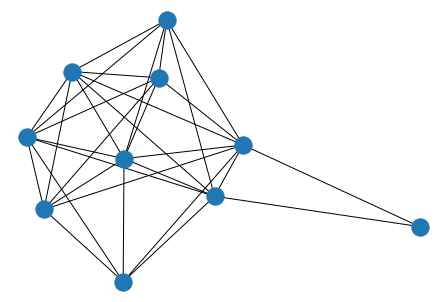

In [64]:
nx.draw(all_node_nx_graph)

**IDENTIFY TOKENS AND MAKE-UP DICTIONARY**

In [ ]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in Tokens_in_Corpus:
    for token in text:
        frequency[token] += 1

Frequent_Tokens_in_Corpus= [[token for token in text if frequency[token] > 1] for text in Tokens_in_Corpus]

from pprint import pprint  # pretty-printer
pprint(Frequent_Tokens_in_Corpus[4:5]) #these slices of lists go up to before the higher number. 

In [ ]:
#create dictionary, then map from ids to dictionary
dictionary = corpora.Dictionary(Frequent_Tokens_in_Corpus)
print(dictionary,"\n\n")
print(dictionary.token2id)

**CREATE BAG OF WORDS MODEL**

In [ ]:
#ie. a list of a list. For each document, we have a list of word frequency for each dictionary item
BAG_OF_WORDS_MODEL = [dictionary.doc2bow(text) for text in Frequent_Tokens_in_Corpus]
for c in BAG_OF_WORDS_MODEL:
    print(c)

From Quick start tutorial. 
"Now that we have vectorized our corpus we can begin to transform it using models. We use model as an abstract term referring to a transformation from one document representation to another. In gensim documents are represented as vectors so a model can be thought of as a transformation between two vector spaces. The details of this transformation are learned from the training corpus."

**CREATE TF-IDF MODEL**
One simple example of a model is tf-idf. The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.
Let's initialize the tf-idf model, training it on our corpus.

In [ ]:
# train the model
TFIDF_MODEL= models.TfidfModel(BAG_OF_WORDS_MODEL)

**CREATE TOPIC MODEL via LSI** via CBOW AND TFIDF

In [ ]:
# LSI APPLIED ON TOP ON TFIDF
#now applying an LSI to the first corpus, by working on top of its representation as a TFIDF
# here we have created a two dim LSI space, like Deerwesters 1990 example
#Presumably we could create one on top of just the CBOW too
lsi_from_TFIDF= models.LsiModel(TFIDF_APPLIED_TO_TRAINING_CORPUS, id2word=dictionary, num_topics=3) # initialize an LSI transformation

#It is correct how it has this odd double-barrelled structure: 
#model = LsiModel(common_corpus, id2word=common_dictionary)
# >>> vectorized_corpus = model[common_corpus]  # vectorize input copus in BoW format

In [ ]:
#inspect the topics
lsi_from_TFIDF.print_topics(num_topics=-1, num_words=20) #-1 means show all topics .In significance order. Remember also _ve Contribs

In [ ]:
#Get a single topic as a formatted string with print_topic(topicno, topn=10)

In [ ]:
#to get as array use lsi.get_topics()

In [ ]:
# can Update model with new corpus using add_documents(corpus, chunksize=None, decay=None)
#can also save the LSI model

**FINDING VECTOR REPRESENTATION OF A WHOLE OLD OR NEW CORPUS**
To prepare for similarity queries, we need to enter all documents which we want to compare against subsequent queries. In our case, they are the same documents used for training LSI, converted to 3-D LSA space. But that’s only incidental, we might also be indexing a different corpus altogether.

   **REPRESENTATION OF OLD CORPUS: TFIDF**

In [ ]:
#now moved onto Topic and Transformations tutorial
#apply tfidf to the trained corpus
TFIDF_APPLIED_TO_TRAINING_CORPUS = TFIDF_MODEL[BAG_OF_WORDS_MODEL]
for doc in TFIDF_APPLIED_TO_TRAINING_CORPUS:
    print(doc)

   **REPRESENTATION OF OLD CORPUS: LSI FROM TFIDF**

In [ ]:
# create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
TOPIC_MODEL_LSI_from_TFIDF_APPLIED_TO_CORPUS = lsi_from_TFIDF[TFIDF_APPLIED_TO_TRAINING_CORPUS] 

#particular documents aligned to particular topics
for doc in TOPIC_MODEL_LSI_from_TFIDF_APPLIED_TO_CORPUS: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
    print(doc)

In [ ]:
#OPTIONAL
#this model can now be applied to another corpus other than the training one, not just individaul documents
#i have not pulled in a second corpus but this is how you would do it. Note you pull in a corpus (processed as above), not just docs. 
#corpus2nd_tfidf = TFIDF_MODEL[corpus2nd]
# for doc in corpus2nd_tfidf:
#   print(doc)

**FINDING VECTOR REPRESENTATION OF A SINGLE NEW DOCUMENT**

In [ ]:
# Up above, we had a CBOW representation of each document
#We can convert documents to that vector space,once tokenized

# eg.This is the announcement of the Sellafield partner programme. https://www.gov.uk/government/news/sellafield-ltd-awards-20-year-project-partnership
#Which ONR document is most relevant to this contract ?

In [ ]:
page = requests.get("https://www.gov.uk/government/news/sellafield-ltd-awards-20-year-project-partnership")
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
new_doc=strip_multiple_whitespaces(soup.get_text())
print(new_doc)

#page = requests.get("https://www.gov.uk/government/news/nda-sets-out-its-grand-challenges")
#page.content[1:300]
# need to find which tag works well with this approach. p does not work well with this NEC text 
#soup.find_all('p')[5].get_text()

In [ ]:
new_doc=new_doc[0:5487]
print(new_doc)

In addition, we will be considering cosine similarity to determine the similarity of two vectors. Cosine similarity is a standard measure in Vector Space Modeling, but wherever the vectors represent probability distributions, different similarity measures may be more appropriate.

   **REPRESENTATION OF NEW DOCUMENT: CBOW ONLY**

In [ ]:
#convert tokenized documents to vector
new_vec_CBOW = dictionary.doc2bow(new_doc.lower().split())

In [ ]:
print(new_vec_CBOW)  # only those words that match up are given a dimension

   **REPRESENTATION OF NEW DOCUMENT: TFIDF**

In [ ]:
#convert the query to LSI space (based on TFIDF) 
new_vec_TFIDF=TFIDF_MODEL[new_vec_CBOW]

   **REPRESENTATION OF NEW DOCUMENT: LSI via TFIDF**

In [ ]:
new_vec_lsi_fromTFIDF = lsi_from_TFIDF[new_vec_TFIDF]
print(new_vec_lsi_fromTFIDF)  

**COSINE SIMILARITY**

moved onto Similarity search tutorial.
Based on this new doc query,we would like to sort our corpus documents in decreasing order of relevance to this query. Unlike modern search engines, here we only concentrate on a single aspect of possible similarities—on apparent semantic relatedness of their texts (words). No hyperlinks, no random-walk static ranks, just a semantic extension overthe boolean keyword match:

   **LSI VIA TFIDF**

In [ ]:
# LSI APPLIED ON TOP ON TFIDF
index = similarities.MatrixSimilarity(lsi_from_TFIDF[TFIDF_APPLIED_TO_TRAINING_CORPUS]) # transform corpus to LSI space and index it

In [ ]:
sims = index[new_vec_lsi_fromTFIDF] # perform a similarity query against the corpus BASED ON LSI - TDFIDF
print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples

Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar), so that the first document has a score of 0.99809301 etc.

With some standard Python magic we sort these similarities into descending order, and obtain the final answer to the query for Sellafield PPP:

In [ ]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims) # print sorted (document number, similarity score) 2-tuples

In [ ]:
#Most like
print (Corpus_of_Summaries[15])

In [ ]:
print (Corpus_of_Summaries[12])

In [ ]:
print (Corpus_of_Summaries[9])

In [ ]:
#Least like
print (Corpus_of_Summaries[11])

In [ ]:
print (Corpus_of_Summaries[10])

   **TFIDF ONLY**

In [ ]:
#Now the same but with TFIDF model
index = similarities.MatrixSimilarity(TFIDF_APPLIED_TO_TRAINING_CORPUS)
new_vec_TFIDF = TFIDF_MODEL[new_vec_CBOW] # convert the query to LSI space (based on TFIDF)
print(new_vec_TFIDF)  

In [ ]:
sims = index[new_vec_TFIDF] 
print(list(enumerate(sims)))
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print ("\n")
print (sims)


**Using keywords into Neo4j concurrence...**


# Acknowledgements

This project relies extensively on the Gensim library, and the [examples](https://radimrehurek.com/gensim/auto_examples/index.html) provided by its creator Radim Hurek. I have done nothing more than apply a little of this to Portfolio management. The examples cited above would be the best way to get a full introduction to the capabilities of Gensim


@inproceedings{rehurek_lrec,
      title = {{Software Framework for Topic Modelling with Large Corpora}},
      author = {Radim {\v R}eh{\r u}{\v r}ek and Petr Sojka},
      booktitle = {{Proceedings of the LREC 2010 Workshop on New
           Challenges for NLP Frameworks}},
      pages = {45--50},
      year = 2010,
      month = May,
      day = 22,
      publisher = {ELRA},
      address = {Valletta, Malta},
      note={\url{http://is.muni.cz/publication/884893/en}},
      language={English}
}